In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-satisfaction/sample_submission.csv
/kaggle/input/santander-customer-satisfaction/train.csv
/kaggle/input/santander-customer-satisfaction/test.csv


# Importing libraries.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from sklearn.metrics import accuracy_score, roc_curve, auc, mean_squared_error, f1_score
import warnings
warnings.filterwarnings('ignore')

# Reading the data.

In [3]:
!ls ../input/santander-customer-satisfaction/

sample_submission.csv  test.csv  train.csv


In [4]:
train = pd.read_csv("../input/santander-customer-satisfaction/train.csv")
test = pd.read_csv("../input/santander-customer-satisfaction/test.csv")
sample = pd.read_csv("../input/santander-customer-satisfaction/sample_submission.csv")

# Preprocessing.

In [5]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [6]:
test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [7]:
sample.head()

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [8]:
print("Shape of train dataframe is {}".format(train.shape))
print("Shape of test dataframe is {}".format(test.shape))
print("Shape of sample dataframe is {}".format(sample.shape))

Shape of train dataframe is (76020, 371)
Shape of test dataframe is (75818, 370)
Shape of sample dataframe is (75818, 2)


In [9]:
print('Null values in training data is {}'.format(train.isnull().sum().any()))
print('Null values in testing data is {}'.format(test.isnull().sum().any()))

Null values in training data is False
Null values in testing data is False


In [10]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


In [13]:
# Findning duplicate rows.

dupli = train[train.duplicated()]
dupli

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET


*No duolicate rows found.*

In [14]:
# Removing all the columns having only 1 unique value.

for i in train.columns:
    if train[i].nunique() == 1:
        print(i)
        train.drop(i, inplace = True, axis = 1)
        test.drop(i, inplace = True, axis = 1)

ind_var2_0
ind_var2
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var41
ind_var46_0
ind_var46
num_var27_0
num_var28_0
num_var28
num_var27
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
num_var2_0_ult1
num_var2_ult1
num_reemb_var13_hace3
num_reemb_var33_hace3
num_trasp_var17_out_hace3
num_trasp_var33_out_hace3
saldo_var2_ult1
saldo_medio_var13_medio_hace3


In [15]:
train.shape

(76020, 337)

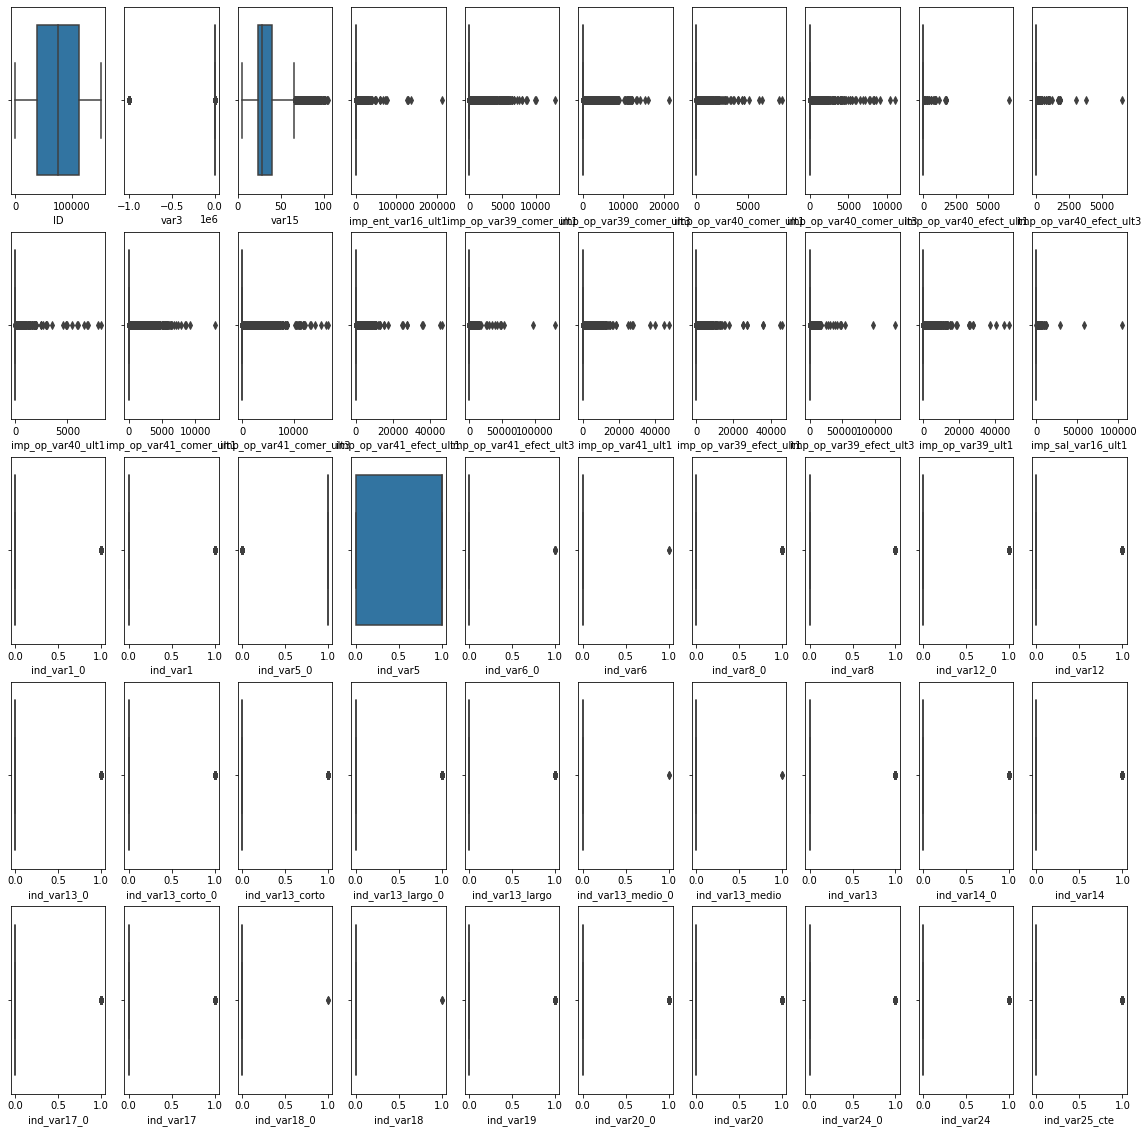

In [16]:
# Before removing Outliers.

plt.figure(figsize = (20,20))
for i in range (50):
    plt.subplot(5, 10, i+1)
    sns.boxplot(train.iloc[:,i])
    plt.xlabel(train.columns[i], size = 10)

In [17]:
def Outliers(data, ft):
    
    IQ1 = data[ft].quantile(0.25)
    IQ3 = data[ft].quantile(0.75)
    IQR = IQ3 - IQ1
    
    lower_bound = IQ1 - 1.5 * IQR
    upper_bound = IQ3 + 1.5 * IQR
    
    index = data.index[ (data[ft] < lower_bound) | (data[ft] > upper_bound) ]
    return index

In [18]:
index = []
for i in train.columns:
    index.extend(Outliers(train, i))
index = list(set(index))
len(index)

48895

In [19]:
# print("Size of training data before removing outliers is {}".format(train.shape))
# train.drop(index, inplace = True, axis = 0)
# print("Size of training data after removing outliers is {}".format(train.shape))

*Here I tried removing outlier, but by removing them I was loosing important information as well. That's why I decided not to remove outliers.*

0    73012
1     3008
Name: TARGET, dtype: int64


Text(0.5, 1.0, 'Distribution in target column before resmpling')

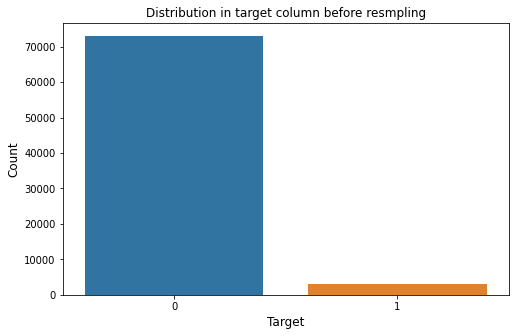

In [20]:
# Count plot for target column.

print(train['TARGET'].value_counts())
plt.figure(figsize = (8,5))
sns.countplot(x = train['TARGET'])
plt.xlabel('Target', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution in target column before resmpling', size = 12)

*Here we can see that target column is unbalanced.*

In [21]:
test_id = test['ID']
train.drop('ID', inplace = True, axis = 1)
test.drop('ID', inplace = True, axis = 1)

In [22]:
x = train.drop('TARGET', axis = 1)
x.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [23]:
y = train.loc[:, 'TARGET']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [24]:
# Sampling the data, to balance the classes in target column.

sampler = RandomUnderSampler()
x, y = sampler.fit_resample(x, y)

0    3008
1    3008
Name: TARGET, dtype: int64


Text(0.5, 1.0, 'Distribution in target column before resmpling')

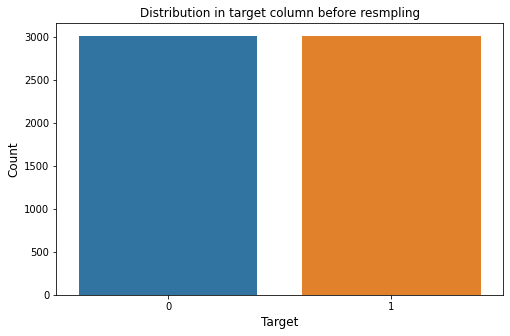

In [25]:
print(y.value_counts())
plt.figure(figsize = (8,5))
sns.countplot(x = y)
plt.xlabel('Target', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution in target column before resmpling', size = 12)

In [26]:
# Applying standard scaler and min max scaler.

col = x.columns
std = StandardScaler()
x_std = std.fit_transform(x)
x_std = pd.DataFrame(data = x_std, columns = col)

mms = MinMaxScaler()
x_mms = mms.fit_transform(x)
x_mms = pd.DataFrame(data = x_mms, columns = col)

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 42)

# Building models.

In [28]:
def Models(model, name, d, xtrain, ytrain, xtest, ytest):
    print("Working on {} model".format(name))
    
    cla = model
    cla.fit(xtrain, ytrain)
    
    predicted = cla.predict(xtrain)
    tr_auc = accuracy_score(predicted, ytrain)*100
    
    predicted = cla.predict(xtest)
    te_auc = accuracy_score(predicted, ytest)*100
    
    F1 = f1_score(predicted, ytest)
    fpr, tpr, threshould = roc_curve(predicted, ytest)
    AUC = auc(fpr, tpr)
    
    d['Name'].append(name)
    d['Training ACU'].append(tr_auc)
    d['Testing ACU'].append(te_auc)
    d['F1'].append(F1)
    d['AUC'].append(AUC)
    
    print("**********"*5)
    print()
    return d

In [29]:
l = [x, x_std, x_mms]
final = []
for i in l:
    xtrain, xtest, ytrain, ytest = train_test_split(i, y, test_size = 0.25, random_state = 42)
    
    d = {'Name' : [], 'Training ACU': [], 'Testing ACU': [], 'F1': [], 'AUC': []}
    
    models = [ 
        [RandomForestClassifier(n_estimators = 200), 'Random Forest'], [DecisionTreeClassifier(), 'Decision Tree'], 
              [XGBClassifier(tree_method='gpu_hist'), 'XGBoost'], 
              [CatBoostClassifier(task_type="GPU"), 'CatBoost'], [GaussianNB(), 'Naive Bayes'], 
              [LogisticRegression(), 'Logistic Regression'] 
    ]

    for model in models:
        d = Models(model[0], model[1], d, xtrain, ytrain, xtest, ytest)
    final.append(d)

Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on XGBoost model
[20:51:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
**************************************************

Working on CatBoost model
Learning rate set to 0.03103
0:	learn: 0.6819844	total: 41.5ms	remaining: 41.4s
1:	learn: 0.6716127	total: 77.6ms	remaining: 38.7s
2:	learn: 0.6623527	total: 113ms	remaining: 37.5s
3:	learn: 0.6523633	total: 149ms	remaining: 37.1s
4:	learn: 0.6439285	total: 185ms	remaining: 36.8s
5:	learn: 0.6353764	total: 223ms	remaining: 37s
6:	learn: 0.6273604	total: 271ms	remaining: 38.4s
7:	learn: 0.6195089	total: 306ms	remaining: 38s
8:	learn: 0.6129564	total: 340ms	remaining: 37.5s
9:

In [30]:
name = ['Normal', 'Standard', 'Min Max']
for i in range (len(name)):
    print(name[i])
    acu_data = pd.DataFrame(data = final[i])
    print(acu_data)
    print("******"*12)

Normal
                  Name  Training ACU  Testing ACU        F1       AUC
0        Random Forest     98.980496    74.202128  0.736771  0.741900
1        Decision Tree     98.980496    66.888298  0.671070  0.669881
2              XGBoost     90.868794    74.933511  0.744060  0.749201
3             CatBoost     82.579787    74.800532  0.745808  0.748253
4          Naive Bayes     52.703901    50.332447  0.658436  0.649087
5  Logistic Regression     49.556738    51.529255  0.000000       NaN
************************************************************************
Standard
                  Name  Training ACU  Testing ACU        F1       AUC
0        Random Forest     98.980496    75.000000  0.744912  0.749879
1        Decision Tree     98.980496    67.287234  0.674172  0.673720
2              XGBoost     90.868794    74.933511  0.744060  0.749201
3             CatBoost     82.513298    75.000000  0.746972  0.750113
4          Naive Bayes     54.078014    52.393617  0.666356  0.671834
5

*Here we are choosing catboost with standard deviation since its giving best score.*

# Making predictions on test data.

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x_std, y, test_size = 0.25, random_state = 42)

In [32]:
cla = CatBoostClassifier(task_type = 'GPU')
cla.fit(xtrain, ytrain, verbose = 100)

Learning rate set to 0.03103
0:	learn: 0.6819844	total: 34.2ms	remaining: 34.2s
100:	learn: 0.4828203	total: 3.45s	remaining: 30.7s
200:	learn: 0.4686917	total: 6.64s	remaining: 26.4s
300:	learn: 0.4589085	total: 9.88s	remaining: 22.9s
400:	learn: 0.4473185	total: 13.3s	remaining: 19.9s
500:	learn: 0.4393031	total: 16.6s	remaining: 16.5s
600:	learn: 0.4321337	total: 20.7s	remaining: 13.8s
700:	learn: 0.4245746	total: 24s	remaining: 10.2s
800:	learn: 0.4185364	total: 27.7s	remaining: 6.87s
900:	learn: 0.4137566	total: 31s	remaining: 3.4s
999:	learn: 0.4094944	total: 34.2s	remaining: 0us


In [33]:
x_test = test.loc[:, :]
col = x_test.columns
x_test = std.transform(x_test)
x_test = pd.DataFrame(data = x_test, columns = col)
x_test.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,0.028824,-0.332751,-0.064279,-0.190596,-0.216144,-0.03836,-0.044846,-0.039962,-0.038192,-0.034559,...,0.0,-0.012894,-0.012894,-0.012894,-0.012894,-0.022269,-0.016526,-0.030272,-0.031047,-0.575584
1,0.028824,-0.102072,-0.064279,-0.190596,-0.216144,-0.03836,-0.044846,-0.039962,-0.038192,-0.034559,...,0.0,-0.012894,-0.012894,-0.012894,-0.012894,-0.022269,-0.016526,-0.030272,-0.031047,-0.533956
2,0.028824,-1.024787,-0.064279,-0.190596,-0.216144,-0.03836,-0.044846,-0.039962,-0.038192,-0.034559,...,0.0,-0.012894,-0.012894,-0.012894,-0.012894,-0.022269,-0.016526,-0.030272,-0.031047,-0.521292
3,0.028824,-0.947894,-0.064279,-0.190596,-0.216144,-0.03836,-0.044846,-0.039962,-0.038192,-0.034559,...,0.0,-0.012894,-0.012894,-0.012894,-0.012894,-0.022269,-0.016526,-0.030272,-0.031047,0.662586
4,0.028824,-1.024787,-0.064279,-0.190596,-0.216144,-0.03836,-0.044846,-0.039962,-0.038192,-0.034559,...,0.0,-0.012894,-0.012894,-0.012894,-0.012894,-0.022269,-0.016526,-0.030272,-0.031047,-0.297331


In [34]:
predicted = cla.predict(x_test)
predicted

array([1, 1, 0, ..., 0, 1, 0])

In [35]:
sample

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,0


In [36]:
submit = pd.DataFrame(data = {'ID' : test_id, 'TARGET' :predicted})
submit

,ID,TARGET
0,2,1
1,5,1
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,1
75814,151832,0
75815,151833,0
75816,151834,1


In [37]:
submit.to_csv('Submission1.csv', index = False)